In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
from generative_social_choice.plots.generate_with_ex_eval.generate_with_ex_eval_plotting_helper_functions import (
    is_relevant_folder,
    get_dataset_from_folder_name,
    get_max_depth_from_folder_name,
    get_query1_prime_prompt_from_folder_name,
    get_query1_prompt_from_folder_name,
)
from generative_social_choice.plots.plotting_helper_functions import get_graph_path
import pandas as pd
from pathlib import Path
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from generative_social_choice.utils.helper_functions import get_base_dir_path

# Decide which dataset and prompt you want to plot

In [5]:
dataset_name = "changemyview"
query1_prompt = "cmv_basic_no_fewshot_yes_cot"
query1_prime_prompt = query1_prompt
max_depth = 10

# Load data

In [6]:
EXPERIMENT_PATH = get_base_dir_path() / "experiments/generate_with_ex_eval"
folders = os.listdir(EXPERIMENT_PATH)

In [7]:
relevant_folders = [
    folder
    for folder in folders
    if is_relevant_folder(
        folder_name=folder,
        dataset_name=dataset_name,
        query1_prompt=query1_prompt,
        query1_prime_prompt=query1_prime_prompt,
        max_depth=max_depth,
    )
]

# Plot data

In [8]:
results = []
for folder_name in relevant_folders:
    try:
        df = pd.read_csv(
            EXPERIMENT_PATH
            / Path(folder_name)
            / get_graph_path(folder_name=EXPERIMENT_PATH / folder_name),
            index_col=0,
        )
        result = df.apply(lambda col: col[col == 1].count() / len(col))
        results.append(result.values)
    except Exception as e:
        continue

result_df = pd.DataFrame(results).transpose()

In [9]:
result_df

,0,1,2,3,4,5,6,7,8,9
0,0.705882,0.3125,0.5625,0.352941,0.5000,0.6250,0.588235,0.7500,0.470588,0.555556
1,0.647059,0.3125,0.5625,0.352941,0.4375,0.6875,0.588235,0.6875,0.529412,0.555556
2,0.647059,0.3125,0.6250,0.411765,0.5000,0.6250,0.529412,0.7500,0.529412,0.555556
3,0.647059,0.3750,0.3750,0.352941,0.5000,0.6875,0.588235,0.7500,0.470588,0.500000
4,0.647059,0.2500,0.6250,0.352941,0.4375,0.6250,0.588235,0.7500,0.529412,0.555556
5,0.647059,0.2500,0.6250,0.352941,0.5000,0.6250,0.588235,0.7500,0.529412,0.555556
6,0.529412,0.5000,0.5000,0.352941,0.4375,0.5625,0.588235,0.7500,0.588235,0.833333
7,0.647059,0.1875,0.5000,0.352941,0.4375,0.6250,0.588235,0.7500,0.529412,0.555556
8,0.705882,0.3125,0.5000,0.235294,0.5000,0.6250,0.647059,0.7500,0.235294,0.500000
9,0.647059,0.3750,0.6250,0.470588,0.4375,0.5625,0.588235,0.7500,0.529412,0.555556


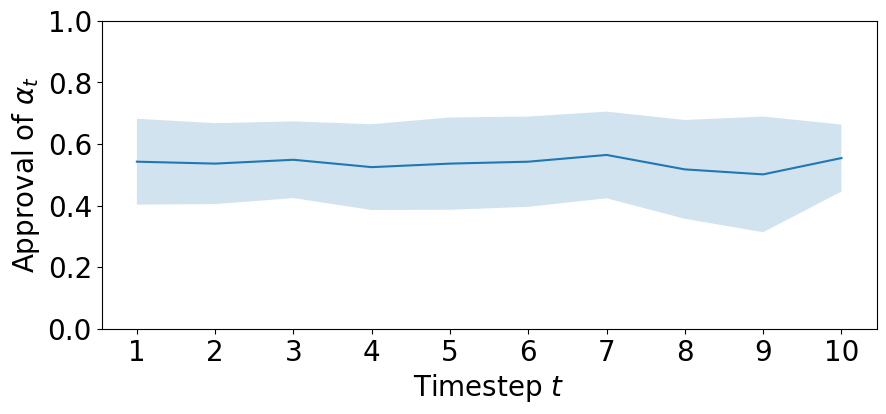

In [10]:
mean_values = result_df.mean(axis=1)
std_values = result_df.std(axis=1)

plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

plt.figure(figsize=(10, 4))
plt.plot(mean_values)
plt.fill_between(
    result_df.index, mean_values - std_values, mean_values + std_values, alpha=0.2
)
n = len(result_df.columns)
plt.xticks(range(n), [str(i + 1) for i in range(n)])
plt.ylim((0, 1))
plt.xlabel("Timestep " + r"$t$")
plt.ylabel("Approval of " + r"$\alpha_t$")
plt.title("")
plt.savefig(
    f"{dataset_name}_{query1_prime_prompt}_{max_depth}.pdf", bbox_inches="tight"
)